In [34]:
from datetime import datetime
from datetime import timezone
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [35]:
# example file path: /Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Database/PICARRO/07/01/CFADS2343-20230701-000011Z-DataLog_User.dat
picarro_path = r"/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Database/PICARRO"
filenames = glob.glob(picarro_path + "/*/*/*.dat")

df_list = []
for filename in filenames:
    df_list.append(pd.read_csv(filename,sep='\s+'))

big_frame = pd.concat(df_list, ignore_index=True)
big_frame["datetime"] = pd.to_datetime((big_frame['DATE'] + ' ' + big_frame['TIME']))
big_frame.sort_values(by='datetime', inplace = True)

big_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6652959 entries, 2214099 to 281926
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   DATE                  object        
 1   TIME                  object        
 2   FRAC_DAYS_SINCE_JAN1  float64       
 3   FRAC_HRS_SINCE_JAN1   float64       
 4   JULIAN_DAYS           float64       
 5   EPOCH_TIME            float64       
 6   ALARM_STATUS          int64         
 7   INST_STATUS           int64         
 8   CavityPressure        float64       
 9   CavityTemp            float64       
 10  DasTemp               float64       
 11  EtalonTemp            float64       
 12  species               float64       
 13  OutletValve           float64       
 14  CH4                   float64       
 15  CH4_dry               float64       
 16  CO2                   float64       
 17  CO2_dry               float64       
 18  h2o_reported          float64       
 19  

In [36]:
big_frame.to_parquet(path = f"{picarro_path}/picarro.parquet")

In [37]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6652959 entries, 2214099 to 281926
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   DATE                  object        
 1   TIME                  object        
 2   FRAC_DAYS_SINCE_JAN1  float64       
 3   FRAC_HRS_SINCE_JAN1   float64       
 4   JULIAN_DAYS           float64       
 5   EPOCH_TIME            float64       
 6   ALARM_STATUS          int64         
 7   INST_STATUS           int64         
 8   CavityPressure        float64       
 9   CavityTemp            float64       
 10  DasTemp               float64       
 11  EtalonTemp            float64       
 12  species               float64       
 13  OutletValve           float64       
 14  CH4                   float64       
 15  CH4_dry               float64       
 16  CO2                   float64       
 17  CO2_dry               float64       
 18  h2o_reported          float64       
 19  

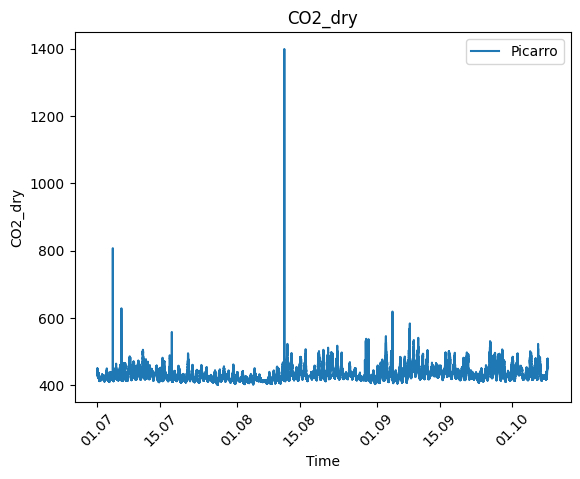

In [38]:
sns.lineplot(data=big_frame,x='datetime',y="CO2_dry",label="Picarro")

# set axes labels
plt.xlabel("Time")
plt.ylabel('CO2_dry')
plt.xticks(rotation=45)
# plt.legend(title="Systems", bbox_to_anchor=(1, 1))
plt.title(label='CO2_dry')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

# show the plot
plt.show()